### First performance tests

**Only the values for the r2- and mean-profiles were used to create figures in /additional_content/plots_offline_paper for the paper**

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import importlib

from tensorflow.keras.models import load_model
# Add path with my_classes to sys.path
sys.path.insert(0, '/pf/b/b309170/workspace_icon-ml/cloud_cover_parameterization/')

from my_classes import load_data

%config Completer.use_jedi = False  #Speeds up autocomplete

In [3]:
root_path = '/pf/b/b309170'
data_path = os.path.join(root_path,
                         'my_work/icon-ml_data/cloud_cover_parameterization/grid_cell_based_v3/based_on_var_interpolated_data')
model_path = os.path.join(root_path,
                          'workspace_icon-ml/cloud_cover_parameterization/grid_cell_based_v3/saved_models')

*Load data*

In [3]:
# We can work with cloud_cover_all_days_input_test_1.npy and cloud_cover_all_days_output_test_1.npy 
# The corresponding model is model_clc_all_days_final_1.h5 (in model_path)
os.listdir(data_path)

['cloud_cover_all_days_input_test_4.npy',
 'cloud_cover_all_days_output_valid_1.npy',
 'cloud_cover_all_days_input_test_1.npy',
 'cloud_cover_all_days_input_train_2.npy',
 'cloud_cover_all_days_output_valid_2.npy',
 'cloud_cover_all_days_input_train_1.npy',
 'cloud_cover_all_days_output_train_3.npy',
 'cloud_cover_all_days_output_train_1.npy',
 'cloud_cover_all_days_output_valid_3.npy',
 'cloud_cover_all_days_input_valid_1.npy',
 'cloud_cover_all_days_input_train_3.npy',
 'cloud_cover_all_days_output_test_3.npy',
 'cloud_cover_all_days_input_valid_3.npy',
 'cloud_cover_all_days_output_test_4.npy',
 'cloud_cover_all_days_input_valid_4.npy',
 'cloud_cover_all_days_input_test_3.npy',
 'cloud_cover_all_days_input_test_2.npy',
 'cloud_cover_all_days_output_test_2.npy',
 'cloud_cover_all_days_input_valid_2.npy',
 'cloud_cover_all_days_output_valid_4.npy',
 'cloud_cover_all_days_input_train_4.npy',
 'cloud_cover_all_days_output_train_4.npy',
 'cloud_cover_all_days_output_train_2.npy',
 'cloud

In [ ]:
# Load data
input_train = np.load(os.path.join(data_path, 'cloud_cover_all_days_input_train_1.npy'))
output_train = np.load(os.path.join(data_path, 'cloud_cover_all_days_output_train_1.npy'))
input_test = np.load(os.path.join(data_path, 'cloud_cover_all_days_input_test_1.npy'))
output_test = np.load(os.path.join(data_path, 'cloud_cover_all_days_output_test_1.npy'))

n_input = input_train.shape[1]

In [5]:
# Checking standardization:
thresh = 1e-7
np.all([np.abs(np.mean(input_train[:, i]))<thresh and 
 (np.abs(np.var(input_train[:, i])-1)<thresh or np.abs(np.var(input_train[:, i]))<thresh)  for i in range(n_input)])

True

*Load model*

In [4]:
model = load_model(os.path.join(model_path, 'model_grid_cell_based_v3_final_1.h5'))

**First visualization method** <br>
Samples on x-axis and cloud cover on y-axis

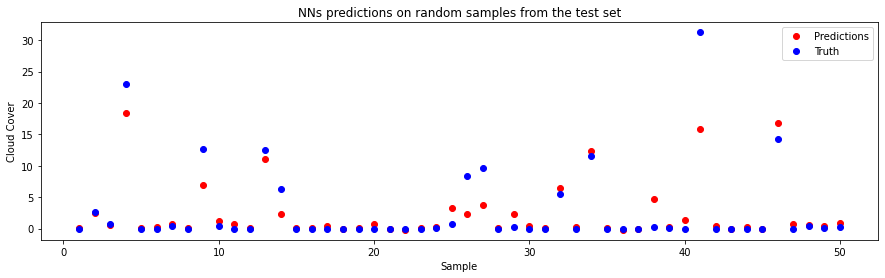

In [7]:
no_samples = 50
clc_pred = model.predict(input_test[:no_samples])[:,0]
clc_true = output_test[:no_samples]
a = np.linspace(1, no_samples, no_samples)

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111, title='NNs predictions on random samples from the test set', 
                     xlabel='Sample', ylabel='Cloud Cover')
ax.plot(a, clc_pred, 'ro')
ax.plot(a, clc_true, 'bo')
ax.legend(['Predictions', 'Truth'])

Adding the other NNs to compare, even though for those this test set was part of the learning set!!!

In [5]:
model_2 = load_model(os.path.join(model_path, 'model_grid_cell_based_v3_final_2.h5'))
model_3 = load_model(os.path.join(model_path, 'model_grid_cell_based_v3_final_3.h5'))
model_4 = load_model(os.path.join(model_path, 'model_grid_cell_based_v3_final_4.h5'))

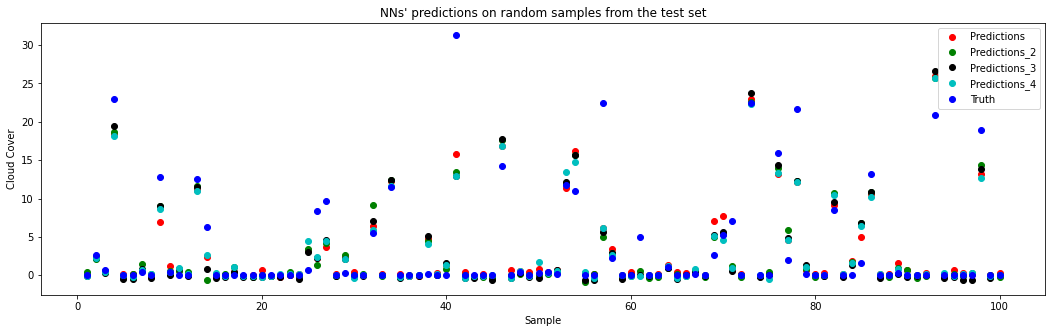

In [9]:
no_samples = 100
clc_pred = model.predict(input_test[:no_samples])[:,0]
clc_pred_2 = model_2.predict(input_test[:no_samples])[:,0]
clc_pred_3 = model_3.predict(input_test[:no_samples])[:,0]
clc_pred_4 = model_4.predict(input_test[:no_samples])[:,0]
clc_true = output_test[:no_samples]
a = np.linspace(1, no_samples, no_samples)

fig = plt.figure(figsize=(18,5))
ax = fig.add_subplot(111, title='NNs\' predictions on random samples from the test set', 
                     xlabel='Sample', ylabel='Cloud Cover')
ax.plot(a, clc_pred, 'ro')
ax.plot(a, clc_pred_2, 'go')
ax.plot(a, clc_pred_3, 'ko')
ax.plot(a, clc_pred_4, 'co')
ax.plot(a, clc_true, 'bo')
ax.legend(['Predictions', 'Predictions_2', 'Predictions_3', 'Predictions_4', 'Truth'])
fig.savefig('../figures/offline_testing_predictions_of_random_samples.pdf')

**Second visualization method** <br>
Mean profile of Cloud Cover on x-axis with Vertical Layer on y-axis <br>
Here, I'm taking the entire dataset for this (not only the test data cannot be uniquely mapped to a single vertical layer from the test set)

In [6]:
# Loads the NARVAL data into the data_dict dictionary
order_of_vars=['qv', 'qi', 'temp', 'pres', 'zg', 'fr_land', 'clc']
data_dict = load_data(source='narval', days='all', vert_interp=True, order_of_vars=order_of_vars)
# data_dict = load_data(source='narval', days='dec_1st', vert_interp=True, order_of_vars=order_of_vars)

qv
qi
temp
pres


In [7]:
#Reshaping into nd-arrays of equaling shapes (have timesteps x vert x hor)
data_dict['zg'] = np.repeat(np.expand_dims(data_dict['zg'], 0), data_dict['qv'].shape[0], axis=0)
data_dict['fr_land'] = np.repeat(np.expand_dims(data_dict['fr_land'], 0), data_dict['qv'].shape[0], axis=0)
data_dict['fr_land'] = np.repeat(np.expand_dims(data_dict['fr_land'], 1), data_dict['qv'].shape[1], axis=1)

assert data_dict['fr_land'].shape == data_dict['qv'].shape == data_dict['zg'].shape

In [8]:
# Reshaping into 1D-arrays and converting dict into a DataFrame-object (the following is based on Aurelien Geron)
for key in order_of_vars:
    data_dict[key] = np.reshape(data_dict[key], -1) 
    
df = pd.DataFrame.from_dict(data_dict)
df.head()

,qv,qi,temp,pres,zg,fr_land,clc
0,0.000002,0.0,226.366128,1530.231208,28193.783559,1.0,0.0
1,0.000002,0.0,227.968134,1528.399878,28193.783559,1.0,0.0
2,0.000002,0.0,226.825919,1528.486878,28193.783559,1.0,0.0
3,0.000002,0.0,228.243447,1521.956216,28193.783559,1.0,0.0
4,0.000002,0.0,228.072678,1525.309351,28193.783559,1.0,0.0


Scaling the input (as Dataframes)

In [11]:
mean_1 = np.array([5.37518440e-03, 4.65389731e-07, 2.59635412e+02, 5.52329389e+04,
 6.79260772e+03, 2.58097095e-01])
std_1 = np.array([6.01943993e-03, 3.95009930e-06, 3.55940285e+01, 3.26642242e+04,
 6.20726361e+03, 4.28313535e-01])
mean_2 = np.array([5.37610303e-03, 4.66308203e-07, 2.59638223e+02, 5.52356240e+04,
 6.79210873e+03, 2.58209529e-01])
std_2 = np.array([6.01992404e-03, 3.97009561e-06, 3.55942162e+01, 3.26643948e+04,
 6.20707739e+03, 4.28369264e-01])
mean_3 = np.array([5.37583902e-03, 4.66074476e-07, 2.59638431e+02, 5.52355186e+04,
 6.79205353e+03, 2.58202179e-01])
std_3 = np.array([6.01948591e-03, 3.95929476e-06, 3.55926320e+01, 3.26636321e+04,
 6.20697197e+03, 4.28360743e-01])
mean_4 = np.array([5.37588425e-03, 4.64950307e-07, 2.59637648e+02, 5.52343099e+04,
 6.79192465e+03, 2.58183961e-01])
std_4 = np.array([6.01996561e-03, 3.95040241e-06, 3.55910392e+01, 3.26622989e+04,
 6.20628503e+03, 4.28359352e-01])

In [12]:
# We add a clc entry in the means and stds
ind_clc = np.where(df.columns=='clc')[0][0]
mean_1 = np.insert(mean_1, ind_clc, values=0)
mean_2 = np.insert(mean_2, ind_clc, values=0)
mean_3 = np.insert(mean_3, ind_clc, values=0)
mean_4 = np.insert(mean_4, ind_clc, values=0)
std_1 = np.insert(std_1, ind_clc, values=1)
std_2 = np.insert(std_2, ind_clc, values=1)
std_3 = np.insert(std_3, ind_clc, values=1)
std_4 = np.insert(std_4, ind_clc, values=1)

In [13]:
# Note that after standardization the mean and variance are not 0 and 1 respectively 
# as the data values above 21km are still in the data
df_1 = ((df - mean_1)/std_1).to_numpy()
df_2 = ((df - mean_2)/std_2).to_numpy()
df_3 = ((df - mean_3)/std_3).to_numpy()
df_4 = ((df - mean_4)/std_4).to_numpy()

In [14]:
np.std(df_1, axis=0) #Note that deviations from 1 are most likely due to the data above 21km still being in the dataset!

array([0.95783299, 0.84823583, 1.01030069, 1.07185105, 1.37175298,
       0.9977659 , 9.04547499])

In [15]:
# model.predict([list(df_1[10000,:-1]),])

In [16]:
# model(tf.constant(df_1[10000:10001,:-1]))

Define the indices of the j-th vertical layer

In [17]:
# --- The number of horizontal fields is different
# (1635, 31, 1024) was the original shape of the data (= timesteps x vertical x horizontal)
def add_two_arrays(a, b):
    '''
    Adding all elements of two arrays with each other, creating a new array.
    Thus: len(add_two_arrays(a,b)) = len(a)*len(b)
    '''
    c = []
    for i in range(len(a)):
        for j in range(len(b)):
            c.append(a[i]+b[j])
    return np.array(c)

Computing the vertical-layer mean of the predictions for cloud cover

In [18]:
# We are not interested in the output of layers above 21km (therefore the range starts at 9)
clc_mean = []
n_features = df_1.shape[1]-1
ind_features = np.delete(np.arange(n_features+1), ind_clc) #We remove the output-class from the feature-indices
df_1_features = df_1[:, ind_features]

for v_layer in range(4, 31):
    # The indices corresponding to a specific v_layer:
    ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))
    pred = model.predict(df_1_features[ind,:])
    pred_adj = np.minimum(np.maximum(pred, 0), 100)  #Cloud Cover is enforced between 0 and 100. 
                                                     #This should also be done in practice
    clc_mean.append(np.mean(pred_adj))  #Contains the mean predictions per vertical layer

The vertical-layer mean cloud cover given by the data

In [19]:
# We are not interested in the output of layers above 21km (therefore the range starts at 9)
clc_data_mean = []
for v_layer in range(4, 31):
    # The indices corresponding to a specific v_layer:
    ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))
    clc_data_mean.append(np.mean(df_1[ind,ind_clc]))

The vertical-layer mean cloud cover predicted by the other models

In [20]:
clc_mean_2 = []
clc_mean_3 = []
clc_mean_4 = []

df_2_features = df_2[:, ind_features]
df_3_features = df_3[:, ind_features]
df_4_features = df_4[:, ind_features]

for v_layer in range(4, 31):
    ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))
    pred = model_2.predict(df_2_features[ind,:])
    pred_adj = np.minimum(np.maximum(pred, 0), 100)
    clc_mean_2.append(np.mean(pred_adj))
for v_layer in range(4, 31):
    ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))
    pred = model_3.predict(df_3_features[ind,:])
    pred_adj = np.minimum(np.maximum(pred, 0), 100)
    clc_mean_3.append(np.mean(pred_adj))
for v_layer in range(4, 31):
    ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))
    pred = model_4.predict(df_4_features[ind,:])
    pred_adj = np.minimum(np.maximum(pred, 0), 100)
    clc_mean_4.append(np.mean(pred_adj))

Plotting

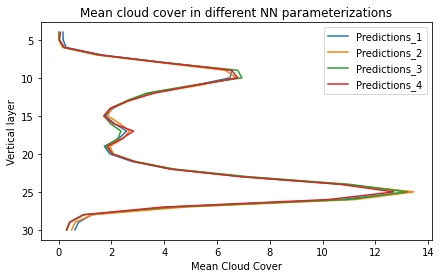

In [21]:
a = np.linspace(4, 30, 27)
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover', ylabel='Vertical layer', 
                     title='Mean cloud cover in different NN parameterizations')
ax.plot(clc_mean, a)
ax.plot(clc_mean_2, a)
ax.plot(clc_mean_3, a)
ax.plot(clc_mean_4, a)
plt.gca().invert_yaxis()
ax.legend(['Predictions_1', 'Predictions_2', 'Predictions_3', 'Predictions_4'])
fig.savefig('../figures/offline_testing_mean_cloud_cover_NNs.pdf')

In [28]:
clc_mean

[0.1635533,
 0.17032495,
 0.28294036,
 1.6375923,
 4.0405183,
 6.566985,
 6.491137,
 5.1089425,
 3.4329896,
 2.6194272,
 2.0605946,
 1.7654794,
 2.1055267,
 2.5771666,
 2.2690954,
 1.7307017,
 1.9348546,
 2.7798536,
 4.2401667,
 6.9686007,
 10.7315035,
 13.304247,
 10.711859,
 4.12894,
 1.2561029,
 0.74989486,
 0.6141081]

Mean height of a vertical layer as y-axis

In [22]:
zg_mean = []
ind_zg = np.where(df.columns=='zg')[0][0]
for v_layer in range(4, 31):
    ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))
    zg_mean.append(np.mean(df_1[ind, ind_zg])*std_1[ind_zg]+mean_1[ind_zg])

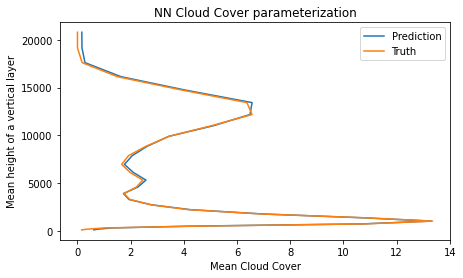

In [23]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover', ylabel='Mean height of a vertical layer', 
                     title='NN Cloud Cover parameterization')
ax.plot(clc_mean, zg_mean)
ax.plot(clc_data_mean, zg_mean)
ax.legend(['Prediction', 'Truth'])
fig.savefig('../figures/offline_testing_mean_cloud_cover.pdf')
# plt.gca().invert_yaxis()

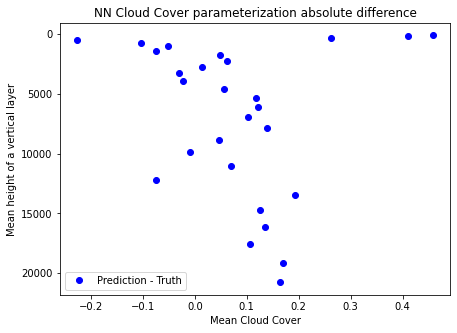

In [24]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover', ylabel='Mean height of a vertical layer', 
                     title='NN Cloud Cover parameterization absolute difference')
ax.plot(np.array(clc_mean) - np.array(clc_data_mean), zg_mean, 'bo')
ax.legend(['Prediction - Truth'])
fig.savefig('../figures/offline_testing_mean_cloud_cover_absolute_difference.pdf')
plt.gca().invert_yaxis()
# NN Cloud Cover parameterization absolute difference

Insertion: Actually if the y-axis is height, then we can focus also on the **test set only**, right?

In [25]:
# Predictions for the entire test set
clc_pred = model.predict(input_test)[:,0]
clc_pred_adj = np.maximum(0, np.minimum(100, clc_pred))

In [26]:
# Extract height values
ind_zg = 4
input_zg = input_test[:, 4]*std_1[4] + mean_1[4]

In [27]:
# This part is not too easy
from scipy import stats
no_bins = 15  #Can vary the number of bins
quantiles = np.linspace(0, 1, no_bins) #We let the quantiles by equally spaced
bin_edges = stats.mstats.mquantiles(input_zg, quantiles) #This defines the bin-edges corresponding to the quantiles
indices_which_bin = np.digitize(input_zg, bin_edges) #The index of the corresponding bin for each input sample
indices_which_bin = indices_which_bin - 1 #We want the counting to start at 0

In [28]:
# Initialize
mean_zg = np.zeros(no_bins); 
mean_clc_pred_adj = np.zeros(no_bins); 
mean_clc_true = np.zeros(no_bins)

for j in range(no_bins):
    mean_zg[j] = np.mean(input_zg[indices_which_bin==j]) #Mean height of the j-th bin
    mean_clc_pred_adj[j] = np.mean(clc_pred_adj[indices_which_bin==j]) #Mean prediction of the j-th bin
    mean_clc_true[j] = np.mean(output_test[indices_which_bin==j]) #Mean true cloud cover value of the j-th bin

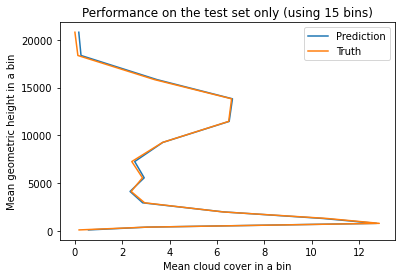

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, title='Performance on the test set only (using %d bins)'%no_bins, ylabel='Mean geometric height in a bin', xlabel='Mean cloud cover in a bin')
ax.plot(mean_clc_pred_adj, mean_zg)
ax.plot(mean_clc_true, mean_zg)
ax.legend(['Prediction', 'Truth'])
plt.savefig('../figures/offline_testing_mean_cloud_cover_test_set_only.pdf')

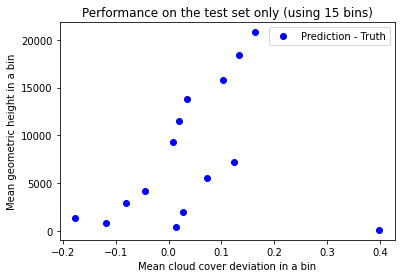

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, title='Performance on the test set only (using %d bins)'%no_bins, ylabel='Mean geometric height in a bin', xlabel='Mean cloud cover deviation in a bin')
ax.plot(mean_clc_pred_adj - mean_clc_true, mean_zg, 'bo')
ax.legend(['Prediction - Truth'])
plt.savefig('../figures/offline_testing_mean_cloud_cover_test_set_only_absolute_diff.pdf')

**Third visualization method** <br>
Hovmöller diagram (time on x-axis with vertical layers on y-axis and NN ensemble mean clc in color) <br>
Looking at the first day here.

In [15]:
# All vertical layers from first time step
pred_clc_mat = np.zeros((25, 31))
for i in range(25):
    for j in range(31):
        # Mean prediction for a specific time step and vertical layer
        df_1_features = np.delete(df_1, ind_clc, axis=1)
        pred_1 = model.predict(df_1_features[1024*(31*i+j):1024*(31*i+j+1),:]) 
        pred_adj_1 = np.mean(np.minimum(np.maximum(pred_1, 0), 100))
        df_2_features = np.delete(df_2, ind_clc, axis=1)
        pred_2 = model_2.predict(df_2_features[1024*(31*i+j):1024*(31*i+j+1),:]) 
        pred_adj_2 = np.mean(np.minimum(np.maximum(pred_2, 0), 100))
        df_3_features = np.delete(df_3, ind_clc, axis=1)
        pred_3 = model_3.predict(df_3_features[1024*(31*i+j):1024*(31*i+j+1),:]) 
        pred_adj_3 = np.mean(np.minimum(np.maximum(pred_3, 0), 100))
        df_4_features = np.delete(df_4, ind_clc, axis=1)
        pred_4 = model_4.predict(df_4_features[1024*(31*i+j):1024*(31*i+j+1),:]) 
        pred_adj_4 = np.mean(np.minimum(np.maximum(pred_4, 0), 100))
        pred_clc_mat[i,j] = 1/4*(pred_adj_1+pred_adj_2+pred_adj_3+pred_adj_4)       

In [16]:
data_clc_mat = np.zeros((25, 31))
for i in range(25):
    for j in range(31):
        # Mean cloud cover for a specific time step and vertical layer
        data_clc_1 = np.mean(df_1[1024*(31*i+j):1024*(31*i+j+1), ind_clc])
        data_clc_2 = np.mean(df_2[1024*(31*i+j):1024*(31*i+j+1), ind_clc])
        data_clc_3 = np.mean(df_3[1024*(31*i+j):1024*(31*i+j+1), ind_clc])
        data_clc_4 = np.mean(df_4[1024*(31*i+j):1024*(31*i+j+1), ind_clc])
        data_clc_mat[i,j] = 1/4*(data_clc_1+data_clc_2+data_clc_3+data_clc_4)

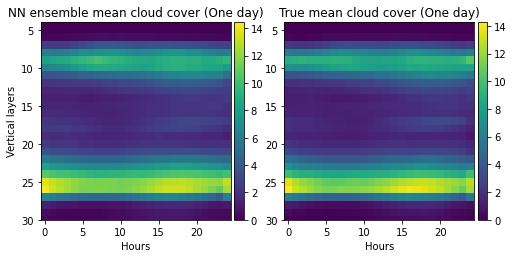

In [17]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

capped_matrix = np.zeros((pred_clc_mat.shape[0], pred_clc_mat.shape[1]))
capped_matrix_data = np.zeros((pred_clc_mat.shape[0], pred_clc_mat.shape[1]))
capped_matrix[:, 4:] = pred_clc_mat[:, 4:]
capped_matrix_data[:, 4:] = data_clc_mat[:, 4:]
# t = np.linspace(1, 25, 25)
# v = np.linspace(9, 75)
# T, V = np.meshgrid(t, v)
fig = plt.figure(figsize=(8,8))
ax_2 = fig.add_subplot(122, xlabel='Hours', ylim=[30, 4], title='True mean cloud cover (One day)')
ims_2 = ax_2.imshow(np.transpose(capped_matrix_data))
# Colorbar axes
divider = make_axes_locatable(ax_2)
cax_2 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ims_2, cax=cax_2)

ax_1 = fig.add_subplot(121, xlabel='Hours', ylim=[30, 4], ylabel='Vertical layers', title='NN ensemble mean cloud cover (One day)')
ims_1 = ax_1.imshow(np.transpose(capped_matrix))
# Colorbar axes
divider = make_axes_locatable(ax_1)
cax_1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ims_1, cax=cax_1)
fig.savefig('../figures/offline_testing_hovmoeller.pdf')

/pf/b/b309170/work/b309170/conda/envs/clouds113/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  del sys.path[0]


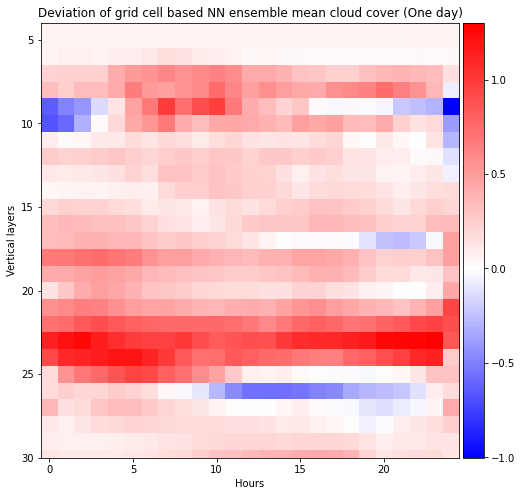

In [18]:
from matplotlib.colors import DivergingNorm

capped_matrix = np.zeros((pred_clc_mat.shape[0], pred_clc_mat.shape[1]))
capped_matrix_data = np.zeros((pred_clc_mat.shape[0], pred_clc_mat.shape[1]))
capped_matrix[:, 4:] = pred_clc_mat[:, 4:]
capped_matrix_data[:, 4:] = data_clc_mat[:, 4:]
# t = np.linspace(1, 25, 25)
# v = np.linspace(9, 75)
# T, V = np.meshgrid(t, v)
fig = plt.figure(figsize=(8,8))

ax_1 = fig.add_subplot(111, xlabel='Hours', ylim=[30, 4], ylabel='Vertical layers', title='Deviation of grid cell based NN ensemble mean cloud cover (One day)')
ims_1 = ax_1.imshow(np.transpose(capped_matrix) - np.transpose(capped_matrix_data), norm=DivergingNorm(0), cmap='bwr')
# Colorbar axes
divider = make_axes_locatable(ax_1)
cax_1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ims_1, cax=cax_1)
fig.savefig('../figures/offline_testing_hovmoeller_diff.pdf')

**Forth visualization method** <br>
R2-value on x-axis with vertical layers on y-axis <br>

R2 = 1-SS_res/SS_tot, <br>
SS_res = total sum of squares (prop. to variance in the data) <br>
SS_tot = residual sum of squares

I think R2 = 1 - MSE/Variance(Data), isn't it?

Best case: R2 = 1 <br>
If R2 < 0, then a constant output model would be better than the ML model.

In [18]:
# MSE per layer

from tensorflow.keras import backend as K
import gc

# We are not interested in the output of layers above 21km (therefore the range starts at 4)
clc_mse = []
n_features = df_1.shape[1]-1
ind_features = np.delete(np.arange(n_features+1), ind_clc) #We remove the output-class from the feature-indices
df_1_features = df_1[:, ind_features]

for v_layer in range(4, 31):
    print(v_layer)
    # The indices corresponding to a specific v_layer:
    ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))

    # Predicting is much faster with predict_on_batch
    batch_size = len(ind)//100
    for i in range(1 + df_1_features[ind,:].shape[0]//batch_size):
        if i == 0:
            pred = model.predict_on_batch(df_1_features[ind,:][i*batch_size:(i+1)*batch_size])
        else:
            pred = np.concatenate((pred, model.predict_on_batch(df_1_features[ind,:][i*batch_size:(i+1)*batch_size])), axis=0)
        K.clear_session()
        gc.collect()
    
    pred_adj = np.minimum(np.maximum(pred, 0), 100)  #Cloud Cover is enforced between 0 and 100. 
                                                     #This should also be done in practice
    mse = np.mean((pred_adj[:, 0] - df_1[ind, ind_clc])**2, dtype=np.float64)
    clc_mse.append(mse)  #Contains the mean predictions per vertical layer

4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


In [19]:
# Variance of the data

# We are not interested in the output of layers above 21km (therefore the range starts at 9)
clc_data_var = []
for v_layer in range(4, 31):
    # The indices corresponding to a specific v_layer:
    ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))
    clc_data_var.append(np.var(df_1[ind,ind_clc]))

In [20]:
r2 = []
assert len(clc_mse) == len(clc_data_var) == 27
for i in range(27):
    r2.append(1 - clc_mse[i]/clc_data_var[i])

In [95]:
# The R2-values on the two uppermost layers are really bad
r2[:2]

[-5288011.705130349, -66.82464193001992]

In [115]:
# Well, with such a low variance
clc_data_var[:2]

[5.603546662699195e-09, 0.0005799529172426363]

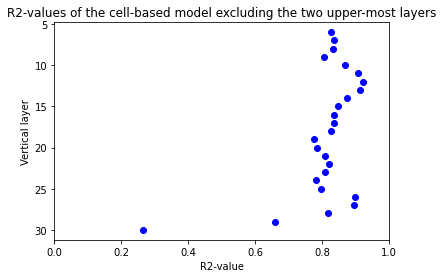

In [114]:
a = np.linspace(6, 30, 25)
fig = plt.figure()

ax = fig.add_subplot(111, xlim=(0, 1), title='R2-values of the cell-based model excluding the two upper-most layers',
                     xlabel='R2-value', ylabel='Vertical layer')
ax.plot(r2[2:], a, 'bo')
plt.gca().invert_yaxis()
fig.savefig('../figures/r2-values.pdf')

In [21]:
r2

[-5288011.708931549,
 -66.82464192315824,
 0.8250699442653973,
 0.8357615218109444,
 0.8322658779596421,
 0.8058549066161531,
 0.8677042814906145,
 0.9064434846872566,
 0.9228692537339417,
 0.9115434235965795,
 0.872814675642628,
 0.8480285425458993,
 0.8349127157336194,
 0.8338951356873923,
 0.8261199712878826,
 0.774354077451422,
 0.7852936153756118,
 0.8087000118148016,
 0.819515544587062,
 0.806677245981631,
 0.7817166468676764,
 0.7958429718943567,
 0.8977171754721437,
 0.8938475923096937,
 0.8155762808324988,
 0.6580476419833761,
 0.2629158100038722]

In [22]:
# Mean on the upper-most layer

v_layer = 4
# The indices corresponding to a specific v_layer:
ind = v_layer*1024 + add_two_arrays(31*1024*np.arange(1635), np.arange(1024))
mean_uppermost = np.mean(df_1[ind,ind_clc])

mean_uppermost

2.0478832779822219e-07